<a href="https://colab.research.google.com/github/lutfiaanjani/-Project-Mini/blob/main/Analisis_Sentimen_Reveiw_Film_di_Situs_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Anggota Kelompok 1 
1. Agnes Frengky Zai - Winning Eleven
2. Widiyaningrum - JumaTec
3. Helena Putri Windari - Winning Eleven
4. Luthfia Anjani - JumaTec
5. Albertus Agung - JumaTec
6. Sephia Miylani - Winning Eleven
7. Sarina - JumaTec

Disini kami melakukan analisis sentimen pada review film di IMDB di mana situs web IMDB ini salah satu anak perusahaan dari Amazon.com. Sedikit pengenalan IMDb (Internet Movie Database) adalah sebuah basis data daring informasi yang berkaitan dengan film, acara televisi, video rumahan, dan permainan video, dan acara internet, termasuk daftar pemeran, biografi kru produksi dan personil, ringkasan alur cerita, trivia, dan ulasan serta penilaian oleh penggemar. Sebuah fitur penggemar tambahan, papan pesan, telah dinonaktifkan pada Februari 2017. Awalnya situs ini dioperasikan oleh penggemar, lalu basis data kemudian dimiliki dan dioperasikan oleh IMDB.com Inc., sebuah anak perusahaan dari Amazon.
IMDb Top 250 adalah daftar dari 250 film berperingkat teratas, berdasarkan peringkat oleh pengguna terdaftar dari situs web menggunakan metode yang dijelaskan. Pada 7 Februari 2019, The Shawshank Redemption berada di urutan pertama dalam daftar.[7] Peringkat "Top 250" hanya berdasarkan pada peringkat "regular voters". Jumlah suara yang harus dilakukan oleh pengguna terdaftar untuk dianggap sebagai pengguna yang memilih secara teratur telah dirahasiakan. IMDb telah menyatakan bahwa untuk mempertahankan keefektifan daftar Top 250 mereka "dengan sengaja tidak mengungkapkan kriteria yang digunakan seseorang untuk dihitung sebagai pemilih biasa". Selain bobot lainnya, 250 film Top juga didasarkan pada formula peringkat tertimbang yang disebut dalam ilmu aktuaria sebagai formula kredibilitas. Dengan banyak fitur yang ditawarkan sekaligus film film yang terkenal membuat kami tertarik untuk menganalisis sentimen dari reveiw film di situs web mereka yaitu IMDB. 
jika ingin tahu mengenai situs web nya silahkan kunjungi link berikut: https://www.imdb.com/


### Data Akuisisi

## Melakukan Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

Gunakan metode read_csv dari library Pandas untuk memuat dataset ke dalam kerangka data "tweets" (*). Anda dapat menggunakan URL online atau mengunduh file dan menggunakan jalur lokal file CSV di mesin Anda.

Langkah selanjutnya, muat dataset yang akan digunakan untuk melatih model. Seperti yang kita bicarakan sebelumnya, Kita akan membangun model analisis sentimen untuk memprediksi sentimen publik tentang 6 maskapai besar yang beroperasi di Amerika Serikat. Dataset tersedia secara bebas di tautan Github ini. Sentimen yang digunakan yaitu hanya positive dan negative.

Gunakan metode read_csv dari library Pandas untuk memuat dataset ke dalam dataframe “tweets”. Kita dapat menggunakan URL online atau mengunduh file dan menggunakan lokal path file CSV di drive.

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv.zip")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
data.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
display(data.columns)

display(data.shape)

Index(['review', 'sentiment'], dtype='object')

(50000, 2)

## Explorasi Data

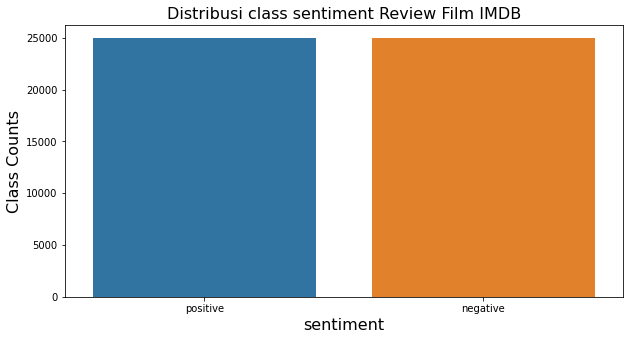

In [ ]:
# Cek jumlah review positive dan negative
plt.figure(figsize=(10,5))
sns.countplot(x='sentiment', data=data)
plt.title('Distribusi class sentiment Review Film IMDB', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('sentiment', fontsize=16)
plt.xticks(rotation='horizontal');

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Pemrosesan Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 1].values 
le = LabelEncoder()
le.fit(["positive", "negative"])
print(list(le.classes_))
y = le.transform(data.iloc[:, 1].values) 

print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['negative', 'positive']
(50000,)
positive
(50000,)
1


In [ ]:
#sentiment count
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
#Melakukan spliting dataset
train_reviews=data.review[:40000]
train_sentiments=data.sentiment[:40000]
#test dataset
test_reviews=data.review[40000:]
test_sentiments=data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [ ]:
##Normalisasi kata -> Tokenization of text dan Setting English Stopwords
tokenizer=ToktokTokenizer()

stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
##Menghapus strip html dan teks noise

In [ ]:
#menghapus strip html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#menghapus tanda kurung siku
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#menghapus noise text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Terapkan fungsi pada kolom ulasan
data['review']=data['review'].apply(denoise_text)

In [ ]:
## Menghapus Karakter Khusus

In [ ]:
#Menentukan fungsi untuk menghapus karakter khusus
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Menerapkan fungsi pada kolom ulasan
data['review']=data['review'].apply(remove_special_characters)

In [ ]:
## Stemming teks

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Menerapkan fungsi pada kolom ulasan
data['review']=data['review'].apply(simple_stemmer)

In [ ]:
## Menghapus stopword (Removing Stopwords)

In [ ]:
#Setel Stopwords ke Bahasa Inggris
stop=set(stopwords.words('english'))
print(stop)

#Menghapus Stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
      filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
      filtered_text = ' '. join(filtered_tokens)
      return filtered_text

#Menerapkan fungsi pada kolom ulasan
data['review']=data['review'].apply(remove_stopwords)

{'do', 'been', 'aren', 'than', 'themselves', 'but', 'o', 'through', 'how', 'these', 'with', 'again', 'couldn', 'once', 'isn', 'now', "doesn't", 'weren', 'having', 'or', 'above', 'herself', "haven't", "you'll", 'no', 'will', 'am', "you've", 'this', 'didn', 'whom', 'don', 'your', 'shouldn', 'won', 'i', 'over', 'can', 'we', 'which', 'doing', 'itself', 'only', 't', 'should', 'were', 'all', 'other', 'down', 'hasn', 'those', 'about', 'her', 'of', 'any', 'his', 'needn', 'and', 'more', 'it', 'during', "shan't", 'for', 'too', 'what', 'being', 'myself', 'a', 'further', "don't", 'm', 'into', 'to', 'haven', 'shan', 'have', 'if', "that'll", 'd', 'wasn', 'some', 'me', 'because', 'while', 'until', 'where', 'before', 'll', "isn't", 'when', 'nor', 'up', "mustn't", "couldn't", 'such', "wouldn't", 'off', 'did', 'so', 'by', "you'd", 'are', "didn't", 'as', "shouldn't", "she's", "hasn't", 'on', 'my', 'be', 'each', 'after', 'him', 'mightn', 'against', 'ma', 'yourself', 'there', 'mustn', 'their', 'ain', 've',

In [ ]:
## Normalized Train Reviews

In [ ]:
#normalized train reviews
norm_train_reviews=data.review[:40000]
norm_train_reviews[0]


'one review ha mention watch 1 Oz episod youll hook right thi exactli happen meth first thing struck Oz wa brutal unflinch scene violenc set right word GO trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call OZ nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda Em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast Oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [ ]:
## Normalized test reviews

In [ ]:
norm_test_reviews=data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

### Bag of Words

In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


### TF-IDF

In [ ]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


## Membagi Data ke Training dan Test Set

In [ ]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## 4. Modeling

In [ ]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic Regression Model Performane on Test Dataset**

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


**Accuracy of The Model**

In [ ]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7512
lr_tfidf_score : 0.75


**Print The Classification Report**

In [ ]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



**Confusion Matrix**

In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3768 1239]
 [1249 3744]]
[[3663 1344]
 [1156 3837]]


**Stochastic Gradient Descent or Linear Support Vector Machines for Bag of Words and TF-IDF Features**

In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


**Model Performance on Test Data**

In [ ]:
#Predicting the Model for Bag of Words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predictinng the Model for TF-IDF Features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


**Accuracy of The Model**

In [ ]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.5829
svm_tfidf_score : 0.5112


**Print the Classification report**

In [ ]:
#Classification Report for Bag of Words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification Report for TF-IDF Features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      0.18      0.30      4993
    Negative       0.55      0.99      0.70      5007

    accuracy                           0.58     10000
   macro avg       0.74      0.58      0.50     10000
weighted avg       0.74      0.58      0.50     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



**Plot the Confusion Matrix**

In [ ]:
#Confusion Matrix for Bag of Words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])

#Confusion Matrix for TF-IDF Features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[5007    0]
 [4888  105]]


**Setelah ini kita lihat kata-kata positif dan negatif dengan menggunakan WordCloud.**

##Word cloud for positive review words

<function matplotlib.pyplot.show>

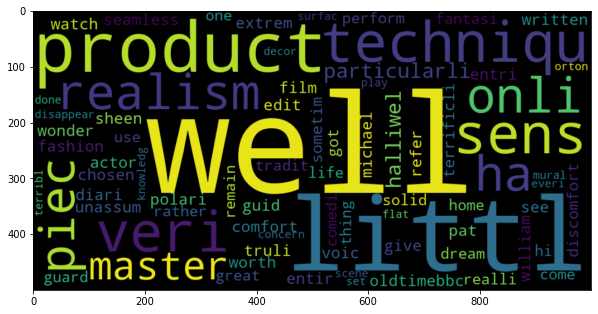

In [ ]:
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

##Word cloud for negative review words

<function matplotlib.pyplot.show>

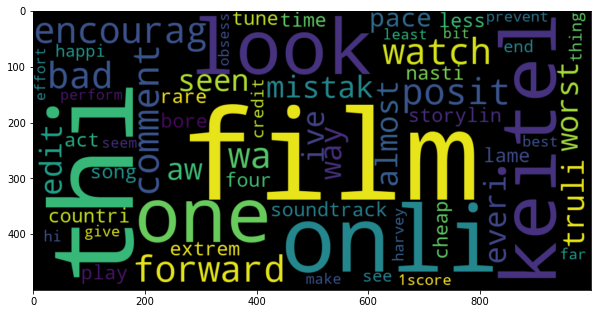

In [ ]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show